<a href="https://colab.research.google.com/github/francescobianca/2048-DeepQLearning-Approach/blob/master/Predict_SocialDistancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
rm -r SocialDistancing

In [ ]:
#Clone the repository of the project
!git clone https://github.com/ManuelPrandini/SocialDistancing.git

Cloning into 'SocialDistancing'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 130 (delta 2), reused 4 (delta 2), pack-reused 121
Receiving objects: 100% (130/130), 80.28 MiB | 5.32 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [ ]:
#install dependencies
!pip install pytube3
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1

#needs for detectron2 to work
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f 'https://download.pytorch.org/whl/torch_stable.html'

#repository for detectron2 fasterRCNN
!rm -rf build/ **/*.so
!pip install detectron2==0.2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

#needs for imageAI Yolov3 to work
!pip install opencv-python==4.1.2.30
!pip install keras==2.3.1
!pip install tensorflow==1.14.0
!pip install tensorflow-gpu==1.14.0
!pip install imageai --upgrade

#install weights of Yolov3 model
!wget https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo-tiny.h5
!wget https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 703.8MB 27kB/s 
     |████████████████████████████████| 6.6MB 46.0MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.9MB 8.9MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200716-cp36-none-any.whl size=42325 sha256=e37db6cc0a030fbd362b6c6329f3d1cf45992cb35eba60c9283290bcccfc2436
  Stored in directory: /root/.cache/pip/wheels/81/99/f4/42a6bef61c07b3d78dfe6d7ebff259444c4526504cf72378d7
Successfully built fvcore
     |████████████████████████████████| 378kB 7.5MB/s 
     |███████████████████████████

In [ ]:
#import libraries of project
from SocialDistancing.utils import *
from SocialDistancing.models import *

from tqdm import tqdm
from copy import deepcopy
from google.colab.patches import cv2_imshow

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
#IF YOU WANT TO TEST A NEW VIDEO YOU SIMPLY:
# 1) ADD VIDEO.MP4 INSIDE VIDEO_FOLDER
# 2) ADD VIDEO_INFO.TXT INSIDE VIDEO_FOLDER
# 3) CHANGE VARIABLE VIDEO_NAME VALUE
#P.S -> REMEMBER THAT YOU NEED TO GET INFO FROM VIDEO LIKE ROI BEFORE FROM TXT FILE!

#define some CONSTANTS
VIDEO_FOLDER = "SocialDistancing/video/"
VIDEO_NAME = "sample5"
VIDEO_FILE = VIDEO_NAME + '.mp4'
VIDEO_TXT = VIDEO_NAME + '.txt'
COLOR_SAFE = (0,255,0)
COLOR_WARNING = (0,255,255)
COLOR_DANGEROUS = (0,0,255)
SELECTED_MODEL = "yolo" #fasterRCNN-yolo

In [ ]:
#create folder with frames of the video
_, _ = save_frames_from_video(VIDEO_FOLDER + VIDEO_FILE)

Save frames from SocialDistancing/video/sample5.mp4 ...
frame_rate: 22.99999998928979
Done! 750 frames saved in./frames/sample5/


In [ ]:
#get informations of the video from text file
video_name, FPS, width, height, points_ROI, points_distance = read_results(VIDEO_FOLDER + VIDEO_TXT)

In [ ]:
#PREDICT AND CREATE FRAMES FOR THE VIDEO, RETURN ALSO THE CONTAGION MAP
#WHERE IS COMPOSED BY TUPLES OF : (N_DETECTED, N_SAFE,N_LOW_RISK,N_HIGH-RISK )
contagion_map = perform_social_detection(VIDEO_NAME,points_ROI,points_distance,width,height,SELECTED_MODEL)

Processing  sample5 ...
find distances with YoloV3


100%|██████████| 750/750 [02:35<00:00,  4.83it/s]


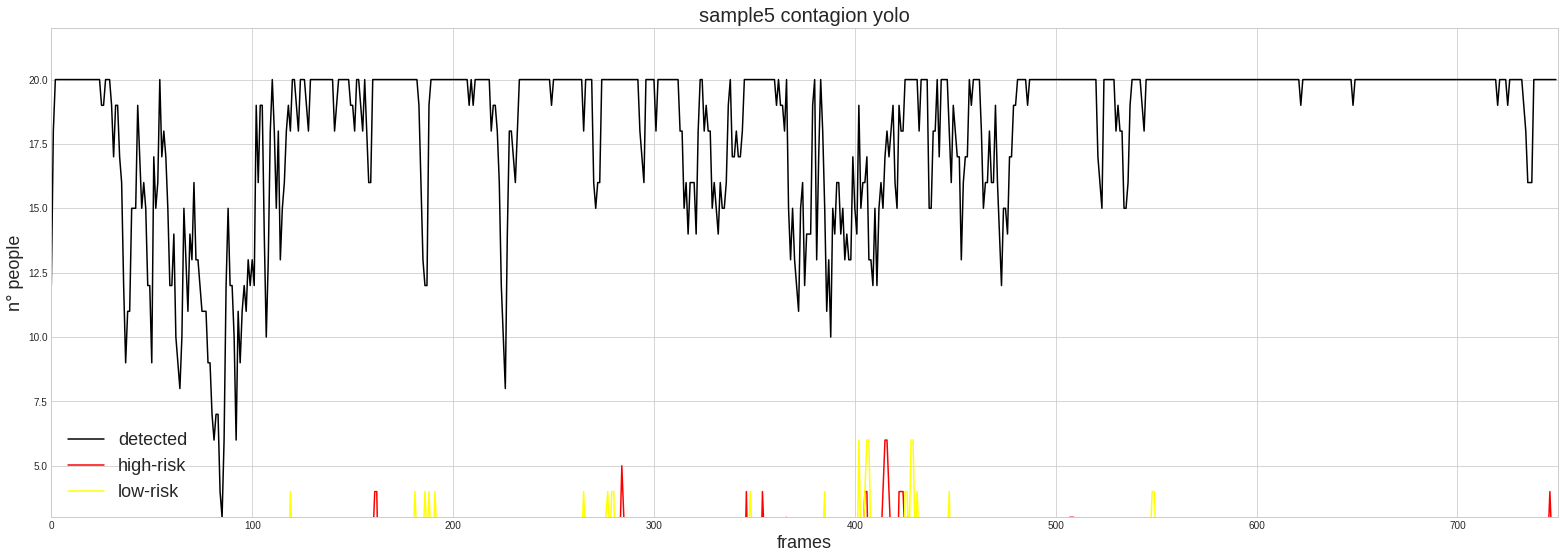

In [ ]:
#HERE CREATE ALL PLOT THAT YOU WANT
#in modality you can combine different lines 
# 'h' -> red line high-risk
# 'l' -> yellow line low-risk
# 's' -> green line safe
# 'hl' -> plot both high-risk and low-risk people, etc.
create_plot_contagion(contagion_map,"sample5 contagion yolo",modality='hl')

In [ ]:
#Save and create video from edit frames
create_video("out/" + VIDEO_NAME + "/","output_yolo_final_sample5.mp4",FPS)